In [1]:
import pandas as pd

df = pd.read_csv("Medical_Insurance_dataset.csv")

In [2]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
df.loc[df['sex']=='male','sex']=1
df.loc[df['sex']=='female','sex']=0
df['sex'] = df['sex'].astype('int')

df.loc[df['smoker']=='yes','smoker']=1
df.loc[df['smoker']=='no','smoker']=0
df['smoker'] = df['smoker'].astype('int')

In [4]:
df = pd.get_dummies(df)

In [5]:
features = df[df.keys().drop('charges')]
target = df['charges'].values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from xgboost import XGBRegressor

clf = XGBRegressor()
clf.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [9]:
pred = clf.predict(X_test_scaled)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("MAE :",mean_absolute_error(y_test,pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,pred)))

MAE : 1700.8408120824179
RMSE : 3627.4274587825284


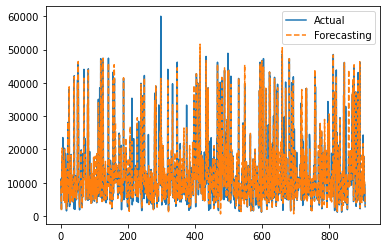

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(y_test, linestyle='-',label='Actual')
plt.plot(pred, linestyle='--', label='Forecasting')
plt.legend()
plt.show()